# Q1

In [12]:
import torch
from torch import nn, optim, autograd
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torchvision.utils as vutils
from dataclasses import dataclass
import time
import sys
import numpy as np
%matplotlib inline
torch.set_num_threads(1)
torch.manual_seed(1)


device = torch.device("cpu") #torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu") #

if device == torch.device("cuda:0"):
  print('Everything looks good; continue')
else:
  # It is OK if you cannot connect to a GPU. In this case, training the model for
  # 2 epoch is sufficient to get full mark. (NOTE THAT 2 epoch takes approximately 1.5 hours to train for CPU)
  print('GPU is not detected. Make sure you have chosen the right runtime type')

GPU is not detected. Make sure you have chosen the right runtime type


In [30]:
@dataclass
class GMM_hp:
    lambda_ : float          =  0.5
    mu      =  [1,-1]
    sigma       = [0.5,0.5]

        
hp = GMM_hp()

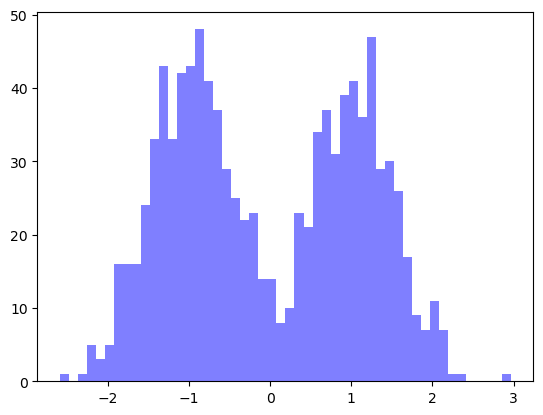

In [31]:
import matplotlib.pyplot as plt
def GMMsample(gmm:GMM_hp, n=1000, b=50):
    U_ = torch.rand(size=(n,), device=device)
    mask = U_ < gmm.lambda_
    S1 = torch.randn(size=U_.shape,device=device)*gmm.sigma[0] + gmm.mu[0]
    S2 = torch.randn(size=U_.shape,device=device)*gmm.sigma[1] + gmm.mu[1]
    samples = torch.where(mask, S1, S2)
    # hist = torch.histc(samples, bins = b,min = 0, max = 1) #torchist.histogramdd(samples,bins=b,low=None , upp = None) #
    return samples

bins = 50
number_samples =1000
samples = GMMsample(hp,n=number_samples , b=bins)
n, bins, patches=plt.hist(samples,bins,facecolor='blue', alpha=0.5)
plt.savefig('gmmSample.png')
plt.show()

# Q2

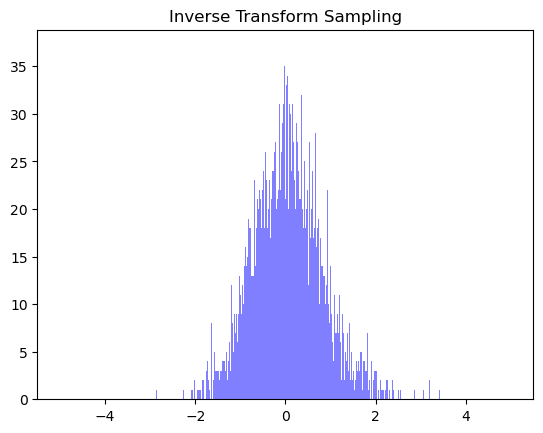

In [74]:
import matplotlib.pyplot as plt
import torchist
def GMMinv(X , gmm:GMM_hp, b=50):
    
    two_  = torch.tensor(2, dtype=torch.int8)
    # 1) cdf of GMM w_1*F1 + w_2*F2 ref : https://stackoverflow.com/questions/48647616/scikitlearn-how-can-i-get-cdf-of-a-gaussian-mixture-model
    
    # 1a CDF of F1 and F2 
    # ref1 : https://www.milefoot.com/math/stat/pdfc-normal.htm#:~:text=With%20this%20approach%2C%20the%20Gaussian,(x%E2%88%9A2)%5D.
    # ref2 : https://www.probabilitycourse.com/chapter4/4_2_3_normal.php#:~:text=.-,To%20find%20the%20CDF,-of
    F1 = 0.5 * (1 + torch.erf((X - gmm.mu[0]) / (gmm.sigma[0] *two_)))  # mixure parameters are given 
    F2 =  0.5 * (1 + torch.erf((X - gmm.mu[1]) / (gmm.sigma[1] *two_)))
    cdf_GMM = ((gmm.lambda_)/gmm.sigma[0])*F1        +     ( (1-gmm.lambda_)/gmm.sigma[1] )*F2
    
    
    # 2) calculating inverse cdf of standard normal distribution
    p = torch.clamp(cdf_GMM, 1e-9, 1 - 1e-9)    # for numerical satbility 
    z = torch.sqrt(two_) * torch.erfinv(2 * p - 1) # ref:https://stats.stackexchange.com/questions/187828/how-are-the-error-function-and-standard-normal-distribution-function-related
    return z

bins = 1000
number_samples =10000
samples = GMMsample(hp,n=number_samples , b=bins)
inverse_dist = GMMinv(samples, hp, b=bins)
n, bins, patches=plt.hist(inverse_dist,bins,facecolor='blue', alpha=0.5,range=(-5,5))
plt.title('Inverse Transform Sampling')
plt.savefig('gmminv.png')
# plt.show()

# Q3

In [ ]:
import matplotlib.pyplot as plt
import torchist
def BinarySearch(F, u, lb=-100, ub=100, maxiter=100, tol=1e-5):
    
    return z

bins = 1000
number_samples =10000
samples = GMMsample(hp,n=number_samples , b=bins)
inverse_dist = GMMinv(samples, hp, b=bins)
n, bins, patches=plt.hist(inverse_dist,bins,facecolor='blue', alpha=0.5,range=(-5,5))
plt.title('Inverse Transform Sampling')
plt.savefig('gmminv.png')
# plt.show()

In [79]:
Zs=  torch.arange(-5,5,0.1)
for i ,z in enumerate(Zs):
    


tensor([-5.0000e+00, -4.9000e+00, -4.8000e+00, -4.7000e+00, -4.6000e+00,
        -4.5000e+00, -4.4000e+00, -4.3000e+00, -4.2000e+00, -4.1000e+00,
        -4.0000e+00, -3.9000e+00, -3.8000e+00, -3.7000e+00, -3.6000e+00,
        -3.5000e+00, -3.4000e+00, -3.3000e+00, -3.2000e+00, -3.1000e+00,
        -3.0000e+00, -2.9000e+00, -2.8000e+00, -2.7000e+00, -2.6000e+00,
        -2.5000e+00, -2.4000e+00, -2.3000e+00, -2.2000e+00, -2.1000e+00,
        -2.0000e+00, -1.9000e+00, -1.8000e+00, -1.7000e+00, -1.6000e+00,
        -1.5000e+00, -1.4000e+00, -1.3000e+00, -1.2000e+00, -1.1000e+00,
        -1.0000e+00, -9.0000e-01, -8.0000e-01, -7.0000e-01, -6.0000e-01,
        -5.0000e-01, -4.0000e-01, -3.0000e-01, -2.0000e-01, -1.0000e-01,
        -2.9802e-09,  1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e-01,
         5.0000e-01,  6.0000e-01,  7.0000e-01,  8.0000e-01,  9.0000e-01,
         1.0000e+00,  1.1000e+00,  1.2000e+00,  1.3000e+00,  1.4000e+00,
         1.5000e+00,  1.6000e+00,  1.7000e+00,  1.8

# Q4

# Q5